# stationary or not convert into stationary

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [30]:
df=pd.read_csv('D:/Dixant/CDAC/Machine Learning/29-12-21/Train.csv')

In [31]:
df.head(25)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
5,5,25-08-2012 05:00,2
6,6,25-08-2012 06:00,2
7,7,25-08-2012 07:00,2
8,8,25-08-2012 08:00,6
9,9,25-08-2012 09:00,2


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [33]:
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M')
df.index = df.Timestamp
df = df.resample('D').mean()  # reduce rows
df.drop(['ID'], axis = 1,inplace=True)

<ipython-input-33-3c9897b2c1ef>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M')


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 762 entries, 2012-08-25 to 2014-09-25
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Count   762 non-null    float64
dtypes: float64(1)
memory usage: 11.9 KB


In [35]:
df.describe()

,Count
count,762.000000
mean,138.958115
std,135.911437
min,2.416667
25%,24.250000
50%,99.125000
75%,215.958333
max,702.333333


<AxesSubplot:xlabel='Datetime'>

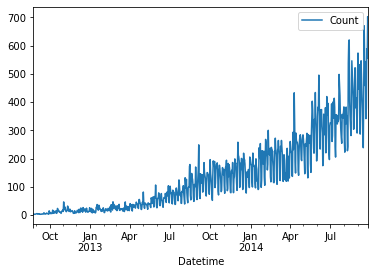

In [36]:
df.plot()

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
test_result=adfuller(df['Count'])
test_result

(2.9863509590138575,
 1.0,
 20,
 741,
 {'1%': -3.4392057325732104,
  '5%': -2.8654483492874236,
  '10%': -2.5688512291811225},
 7212.068059584323)

In [39]:
def adfuller_test(count):
    result=adfuller(count)
    #print(result)
    labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis.")
    else:
        print("weak evidence against null hypothesis, indicating it is non-stationary ")

In [40]:
adfuller_test(df['Count'])

ADF Test Statistic : 2.9863509590138575
p-value : 1.0
Lags Used : 20
Number of Observations Used : 741
weak evidence against null hypothesis, indicating it is non-stationary 


In [41]:
a=pd.DataFrame(df.Count)

In [42]:
type(a)

pandas.core.frame.DataFrame

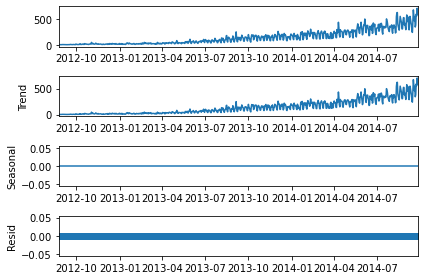

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(a,model='additive',period=1)
decompose_result.plot()
plt.show()

In [44]:
a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 762 entries, 2012-08-25 to 2014-09-25
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Count   762 non-null    float64
dtypes: float64(1)
memory usage: 11.9 KB


In [45]:
y_to_train = a.iloc[:500] # dataset to train
y_to_test = a.iloc[500:] # last X months for test 
predict_date = len(df) - len(y_to_train) 

In [46]:
predict_date

262

In [47]:
a.iloc[:533]

,Count
Datetime,
2012-08-25,3.166667
2012-08-26,3.666667
2012-08-27,2.583333
2012-08-28,2.416667
2012-08-29,2.500000
...,...
2014-02-04,267.750000
2014-02-05,254.500000
2014-02-06,216.916667


# EMA

In [48]:
from statsmodels.tsa.api import SimpleExpSmoothing

0.0902080432991429


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

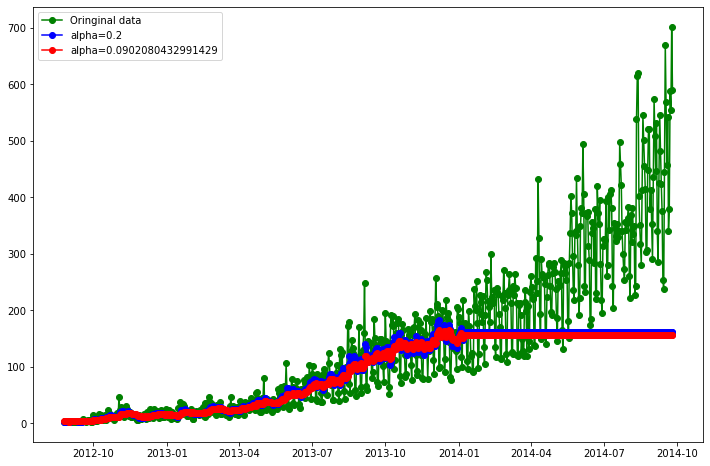

In [49]:
fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(predict_date)
fit2 = SimpleExpSmoothing(y_to_train).fit() 
#statsmodels to automatically find an optimized alpha value for us.
fcast2 = fit2.forecast(predict_date)
alpha = fit2.params["smoothing_level"]
print(alpha)
plt.figure(figsize=(12, 8))
plt.plot(a, marker="o", color="green",label='Oringinal data')
plt.plot(fit1.fittedvalues, marker="o", color="blue")
line1 = plt.plot(fcast1, marker="o", color="blue",label='alpha=0.2')
plt.plot(fit2.fittedvalues, marker="o", color="red")
line2 = plt.plot(fcast2, marker="o", color="red",label=f'alpha={alpha}')
plt.legend()
plt.show

In [50]:
sse1 =fit1.sse
print(sse1)
sse2 =fit2.sse
print(sse2)

355791.58070514747
343289.7920678891


# Holt's Linear Treand Method

In [51]:
from statsmodels.tsa.api import Holt

0.05219843220675429
0.02899335202587275


<ipython-input-52-4e39b90b3a87>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(y_to_train).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False) #sm


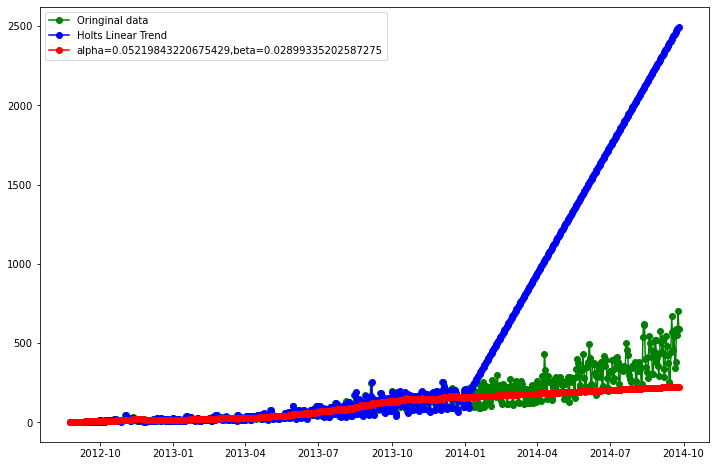

In [52]:
fit1 = Holt(y_to_train).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False) #sm
fcast1 = fit1.forecast(predict_date)
fit2 = Holt(y_to_train).fit()
fcast2 = fit2.forecast(predict_date)
 
 
alpha = fit2.params["smoothing_level"]
print(alpha)
beta = fit2.params["smoothing_trend"]
print(beta) 
 
 
plt.figure(figsize=(12, 8))
plt.plot(a, marker="o", color="green",label='Oringinal data')
plt.plot(fit1.fittedvalues, marker="o", color="blue")
line1 = plt.plot(fcast1, marker="o", color="blue",label='Holts Linear Trend')
plt.plot(fit2.fittedvalues, marker="o", color="red")
line2 = plt.plot(fcast2, marker="o", color="red",label=f'alpha={alpha},beta={beta}')
plt.legend()
plt.show()

In [53]:
sse1 =fit1.sse
print(sse1)
sse2 =fit2.sse
print(sse2)

468174.41293534497
332557.16229386977


# Holt-Winters’ Seasonal Method

In [54]:
from statsmodels.tsa.api import ExponentialSmoothing

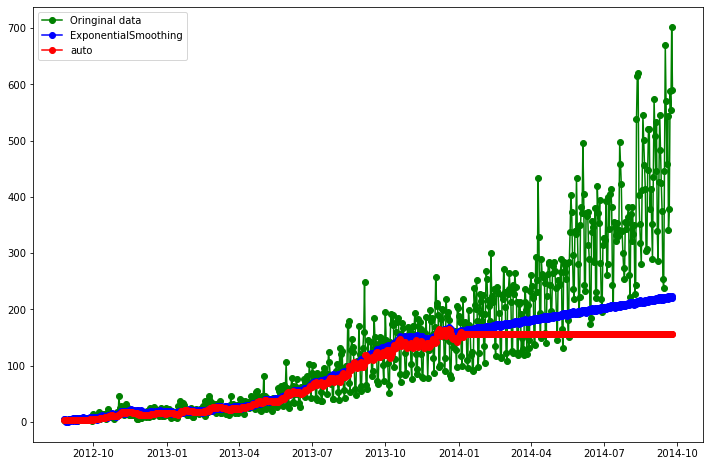

In [55]:
fit1 = ExponentialSmoothing(y_to_train,seasonal_periods = 12, trend='add', seasonal='add').fit()
fcast1 = fit1.forecast(predict_date)
fit2 = ExponentialSmoothing(y_to_train).fit() # use_boxcox=True
fcast2 = fit2.forecast(predict_date) 
 
plt.figure(figsize=(12, 8))
plt.plot(a, marker="o", color="green",label='Oringinal data')
plt.plot(fit1.fittedvalues, marker="o", color="blue")
line1 = plt.plot(fcast1, marker="o", color="blue",label='ExponentialSmoothing')
plt.plot(fit2.fittedvalues, marker="o", color="red")
line2 = plt.plot(fcast2, marker="o", color="red",label='auto')
plt.legend()
plt.show()

In [56]:
#square sum error
sse1 =fit1.sse
print(sse1)
sse2=fit2.sse
print(sse2)

330255.0613759201
343289.7920678891


In [57]:
fcast1

2014-01-07    159.919288
2014-01-08    163.727331
2014-01-09    161.464555
2014-01-10    160.294022
2014-01-11    165.569828
                 ...    
2014-09-21    222.612804
2014-09-22    224.107397
2014-09-23    220.319909
2014-09-24    224.146138
2014-09-25    219.785454
Freq: D, Length: 262, dtype: float64